In [286]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [283]:
def exponential_mechanism_slice(X: list, q: float, eps: float, bound: tuple[float, float],
                                slice: tuple[int, int] = None
                                ) -> float:
    n = len(X)
    rank = np.floor(q * n)
    # get slice
    if slice is None:
        # get all elements
        slice = (1, n)
    X = [X[i - 1] for i in range(slice[0], slice[1] + 1)]

    # add left bound and right bound to X
    X = [bound[0]] + X + [bound[1]]

    # get an iterator
    iterator = zip(X[:-1], X[1:])
    # get utility
    utility = np.array([abs(i - 1 - rank) for i in range(slice[0], slice[1] + 1)])
    utility = np.append(utility, abs(n - rank))

    # print("utility", utility)
    # compute the scores
    scores = np.array([np.exp(-(eps / 2) * u) * (I[1] - I[0]) for I, u in zip(iterator, utility)])
    # print("scores", scores)
    # print("max", max(scores))
    # print("min", min(scores))
    # print("mean", np.mean(scores))
    # sample random index from the scores
    idx = np.random.choice(len(scores), p=scores / np.sum(scores))
    # print("idx", idx)
    # print("left", X[idx])
    # print("right", X[idx + 1])
    # sample random number from the interval
    sample = np.random.uniform(X[idx], X[idx + 1])
    return sample

In [276]:
def error(X: list, q: float, estimate: float) -> float:
    n = len(X)
    # for each result, get the position of the closest element in the sorted array
    position = np.searchsorted(X, estimate)
    true_positions = math.floor(q * n)
    # compute the rank error
    rank_error = np.abs(position - true_positions)
    return rank_error

In [277]:
def generate_uniform_sample(n: int, bounds: tuple[int, int], seed: float = None, epsilon=1e-10) -> list[float]:
    if seed is not None:
        np.random.seed(seed)
    # generate n samples from a uniform distribution
    return np.random.uniform(bounds[0] + epsilon, bounds[1], n).tolist()

In [317]:
n = 10_000
eps = 1
slice_parameter = range(1, 100)
bounds = (0, 2 ** 32)
X = generate_uniform_sample(n, bounds, seed=42)
X = np.sort(X)
q = 0.5
experiments = 100
results = np.zeros((len(slice_parameter), experiments))
for i, l in enumerate(slice_parameter):
    if l == "no slice":
        slice = (1, n)
    else:
        slice = (math.floor(q * n) - l, math.floor(q * n) + l + 1)
    for j in range(experiments):
        estimate = exponential_mechanism_slice(X, q, eps, bounds, slice)
        results[i][j] = error(X, q, estimate)

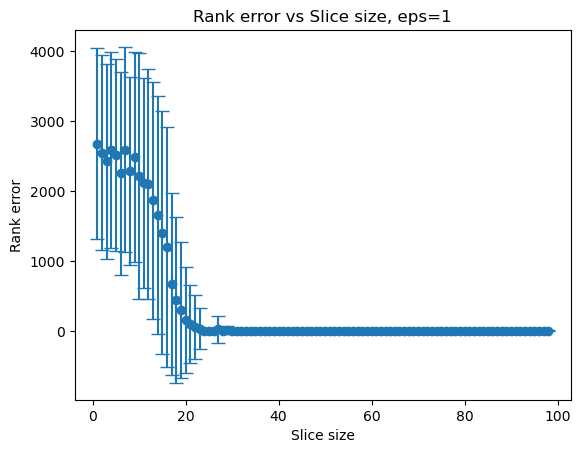

In [319]:
# plot the results
fig, ax = plt.subplots()
x = slice_parameter[:-1]
y = results[:-1].mean(axis=1)
yerr = results[:-1].std(axis=1)
ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=5)
ax.set_xlabel('Slice size')
# log scale on x
ax.set_ylabel('Rank error')
ax.set_title('Rank error vs Slice size, eps=1')
plt.show()

In [322]:
n = 10_000
eps = 0.1
slice_parameter = range(1, 1000)
bounds = (0, 2 ** 32)
X = generate_uniform_sample(n, bounds, seed=42)
X = np.sort(X)
q = 0.5
experiments = 100
results = np.zeros((len(slice_parameter), experiments))
for i, l in enumerate(slice_parameter):
    if l == "no slice":
        slice = (1, n)
    else:
        slice = (math.floor(q * n) - l, math.floor(q * n) + l + 1)
    for j in range(experiments):
        estimate = exponential_mechanism_slice(X, q, eps, bounds, slice)
        results[i][j] = error(X, q, estimate)

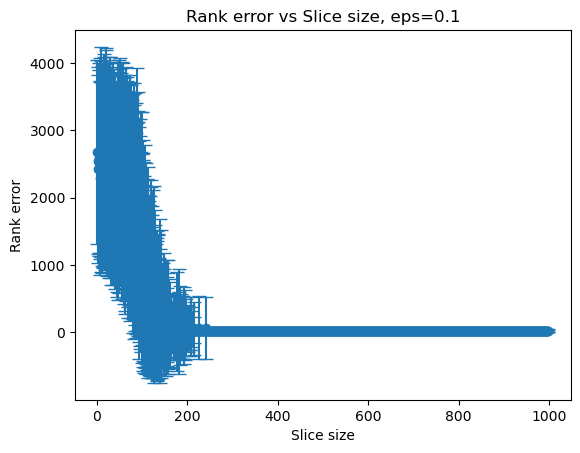

In [323]:
# plot the results
fig, ax = plt.subplots()
x = slice_parameter[:-1]
y = results[:-1].mean(axis=1)
yerr = results[:-1].std(axis=1)
ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=5)
ax.set_xlabel('Slice size')
# log scale on x
ax.set_ylabel('Rank error')
ax.set_title('Rank error vs Slice size, eps=0.1')
plt.show()